# 1. Data Ingestion

In [55]:
import numpy as np
import pandas as pd

In [56]:
data =  pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\Projects\Python\Website\website_wata.csv")

In [57]:
data.head(10)

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
5,3,4.541868,0.420740,Social,3.438712,2,1.0
6,5,1.949558,0.034978,Social,2.119271,1,1.0
7,4,1.685740,0.252343,Paid,3.478016,5,1.0
8,6,0.033268,0.120703,Organic,5.285519,1,1.0
9,7,7.833742,0.212727,Paid,4.060115,5,1.0


In [16]:
data.shape

(2000, 7)

# 2. Data Cleaning

In [17]:
data.isnull()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False


In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(2000, 7)

# 3. Exploratory data analysis

- Traffic Analysis :  Understand where your visitors are coming from and their behavior patterns.

a.Breakdown by Traffic Source

a.i. Sessions x Traffic source

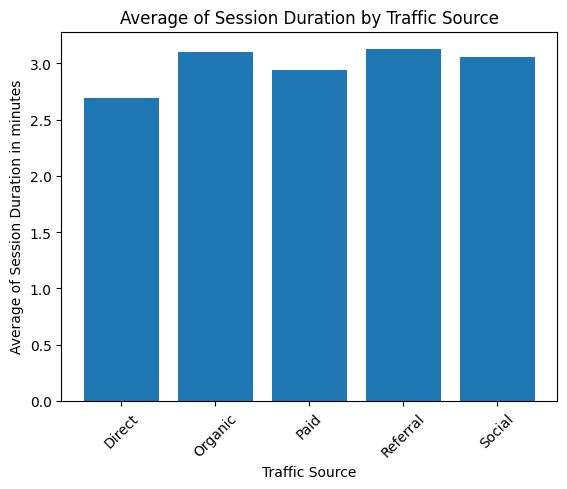

In [40]:
import matplotlib.pyplot as plt


aggregated_data = data.groupby("Traffic Source")["Session Duration"].mean()


plt.bar(aggregated_data.index, aggregated_data.values)
plt.xlabel('Traffic Source')
plt.ylabel('Average of Session Duration in minutes')
plt.title('Average of Session Duration by Traffic Source')
plt.xticks(rotation=45)  
plt.show()

a.ii. page views x Traffic source

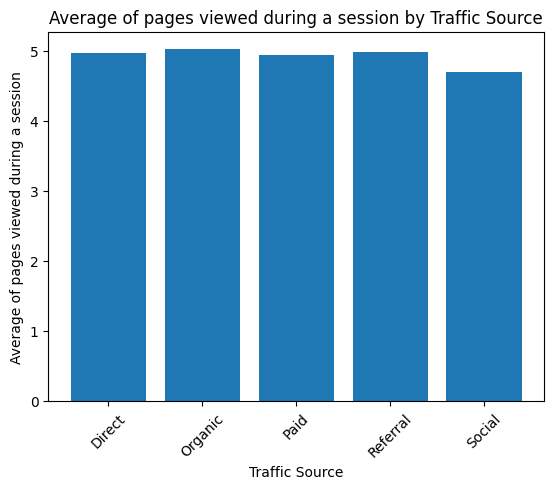

In [34]:
import matplotlib.pyplot as plt


aggregated_data = data.groupby("Traffic Source")["Page Views"].mean()


plt.bar(aggregated_data.index, aggregated_data.values)
plt.xlabel('Traffic Source')
plt.ylabel('Average of pages viewed during a session')
plt.title('Average of pages viewed during a session by Traffic Source')
plt.xticks(rotation=45) 
plt.show()

a.iii. conversion rates x Traffic source

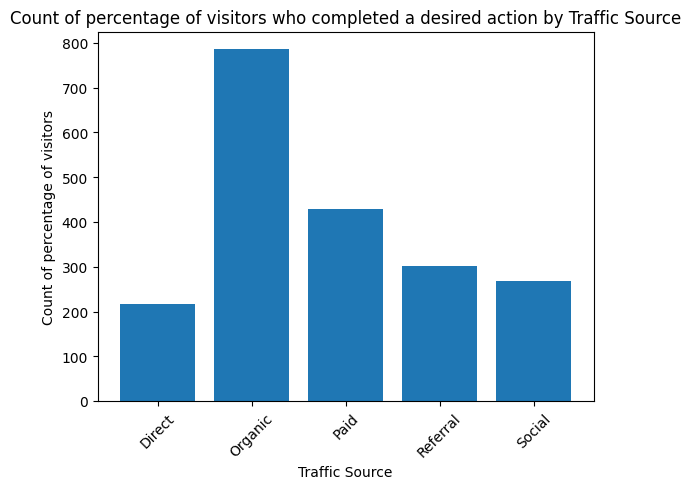

In [42]:
import matplotlib.pyplot as plt


aggregated_data = data.groupby("Traffic Source")["Conversion Rate"].count()


plt.bar(aggregated_data.index, aggregated_data.values)
plt.xlabel('Traffic Source')
plt.ylabel('Count of percentage of visitors')
plt.title('Count of percentage of visitors who completed a desired action by Traffic Source')
plt.xticks(rotation=45) 
plt.show()

b. Identify which traffic sources drive the most engagement and conversions.

In [64]:
top_engagement = data.loc[data['Page Views'].idxmax()]
time_spent_ = data.loc[data['Session Duration'].idxmax()]
bounce_rate = data.loc[data['Bounce Rate'].idxmin()]
time_on_page = data.loc[data['Time on Page'].idxmax()]

print("Traffic source driving the most engagement:")
print(top_engagement)

print("\nTraffic source spending the most time on the website: Session Duration")
print(time_spent_)

print("\nTraffic source spending the most time on the website:")
print(bounce_rate)

print("\nTraffic source spending the most time on a page:")
print(time_on_page)

Traffic source driving the most engagement:
Page Views                14
Session Duration    1.907083
Bounce Rate         0.300452
Traffic Source       Organic
Time on Page        6.343242
Previous Visits            3
Conversion Rate          1.0
Name: 1502, dtype: object

Traffic source spending the most time on the website: Session Duration
Page Views                  4
Session Duration    20.290516
Bounce Rate          0.599827
Traffic Source           Paid
Time on Page         1.256013
Previous Visits             1
Conversion Rate           1.0
Name: 1151, dtype: object

Traffic source spending the most time on the website:
Page Views                 4
Session Duration    2.418276
Bounce Rate         0.007868
Traffic Source       Organic
Time on Page        7.360139
Previous Visits            0
Conversion Rate          1.0
Name: 267, dtype: object

Traffic source spending the most time on a page:
Page Views                  5
Session Duration     9.651241
Bounce Rate          0.327

- Bounce Rate by Traffic Source:

b.i. Correlate session duration with conversion rates to determine if longer sessions lead to better outcomes

Correlation between Session Duration and Conversion Rate: 0.18


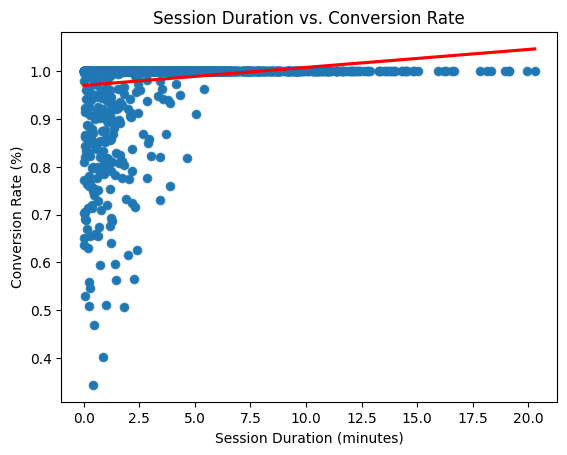

In [74]:
import seaborn as sns

correlation = data['Session Duration'].corr(data['Conversion Rate'])
print(f"Correlation between Session Duration and Conversion Rate: {correlation:.2f}")

# Scatter plot with trend line
sns.scatterplot(x='Session Duration', y='Conversion Rate', data=data)
sns.regplot(x='Session Duration', y='Conversion Rate', data=data, ci=None, line_kws={"color": "red"})

plt.title('Session Duration vs. Conversion Rate')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Conversion Rate (%)')
plt.show()

_____________________________________________________________________________________________________________________________________________